## DBSCAN:
IT is an unsupervised machine learning algorithm. This algorithm defines clusters as continuous regions of high density. It is very useful to detect Outlers/Noises.By using DBSCAN we can solve real time problems.

#### It consists of several things like,
#### Epsilon:
distance which we look for the neighboring points; 
#### Min points: 
the minimum number of points specified by user; 
#### Core points:
It is the number of points inside the eps radius of a point is greater than or equal to the minimum points; 
#### Border points: 
If the number of points inside the eps radius of a point is less than the nin_point and lies within eps radius region of a core point,its called border point.; 
#### and  Noise: 
A point which is neither a core nor a border point is called noise(it is the outlier).

In [1]:
#necessory libs to import:

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
#data creation

centers=[[1,1],[-1,-1],[1,-1]]
#we are using make_blob for dataset creation:
x,labels_true=make_blobs(n_samples=780,centers=centers,cluster_std=0.4,random_state=0)  


In [3]:
x= StandardScaler().fit_transform(x)
x[:10]   #for printing top 10 rows

array([[ 0.49839887, -0.95440211],
       [ 0.58826021, -0.69495423],
       [ 1.53530228,  0.73864919],
       [-0.73905508, -0.33655539],
       [-0.13416899,  2.10956411],
       [-1.19930205, -0.46749364],
       [-1.07596663, -0.47165024],
       [-1.29265337, -0.32268514],
       [ 0.60257649,  1.18924009],
       [ 0.64122713, -1.2390843 ]])

In [21]:
# DBSCAN model creation:
db=DBSCAN(eps=0.25,min_samples=4).fit(x)

#we are calculating these for showcasing in the diagram:

core_samples_mask=np.zeros_like(db.labels_,dtype=bool) #creating an array of true and false as the same size as db.label

core_samples_mask[db.core_sample_indices_]=True      #setting the indices of the core region to true

labels=db.labels_

In [22]:
# Number of clusters in labels,ignoring noise if present:

n_clusters_= len(set(labels))-(1 if -1 in labels else 0 ) #the -1 is considered as noise by DBSCAN algorithm

n_noise_=list(labels).count(-1)  #calculating the number of clusters & noise

In [23]:
print('Estimated Number of Cluster:%d'%n_clusters_)
print('Estimated Number of Noise Points:%d'%n_noise_)

"""Homogeneity metric of cluster labelling given a ground truth.A clustering result satisfies homogeniety if all of its 
clusters contain only data points which are members of a single class"""

print("Homogeneity:%0.3f"% metrics.homogeneity_score(labels_true,labels))


Estimated Number of Cluster:3
Estimated Number of Noise Points:9
Homogeneity:0.935


## For Demonstration purpose:

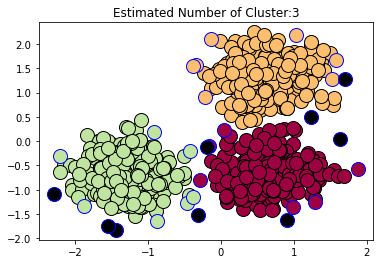

In [24]:
#plot result
import matplotlib.pyplot as plt

unique_labels=set(labels)# identify all the unique labels/clusters

colors=[plt.cm.Spectral(each)
       for each in np.linspace(0,1,len(unique_labels))] #creating the list of colours ,generating the colour map
for k,col in zip(unique_labels,colors):
    if k==-1:
        col=[0,0,0,1]   #Black used for Noise
    class_member_mask=(labels==k)   #assigning class member for each class
    xy=x[class_member_mask & core_samples_mask]  #creating the list of points for each class
    
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=14)
    
    xy= x[class_member_mask & ~core_samples_mask] #creating the list of noise point
    
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='b',markersize=14)
    
plt.title('Estimated Number of Cluster:%d'% n_clusters_)
plt.show()

### Three Type of cluster Orange, green and red is there. The Noise points are black in colour. Some datapoints have blue outline those are Border points.

In [33]:
# Finding counts in each cluster:
np.unique(labels,return_counts=True)

#select only noises or outliers for further action:
noises=x[labels==-1]
print('These are the Noise data points:', noises)

These are the Noise data points: [[ 1.70086176  1.27645631]
 [ 1.23433508  0.49880955]
 [-1.4392146  -1.82944665]
 [ 1.63492213  0.04684776]
 [-1.5417309  -1.7470137 ]
 [-0.18362071 -0.12900198]
 [ 0.91269676 -1.63013644]
 [-0.31744857 -1.51745399]
 [-2.28955164 -1.09226578]]


In [29]:
import joblib
joblib.dump(DBSCAN,'DBSCAN_file.obj')

# SAVING THE MODEL

['DBSCAN_file.obj']

### Conclusion:
#### So by using DBSCAN we can detect the outliers/Noise. By detecting the noise, it would be easy to get to know the anomalies that is present in the data. After having the knowlege of the problem it will be helpful to apply required measures.
